In [304]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import numpy as np

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import networkx as nx
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Coactivation Matrix

In [182]:
file_path_cm = r"Coactivation_matrix.mat"
cm_matrix_data = scipy.io.loadmat(file_path_cm)
coactivation_matrix= cm_matrix_data['Coactivation_matrix']

#OG Dataset
df_cm = pd.DataFrame(coactivation_matrix)
df_cm

,0,1,2,3,4,5,6,7,8,9,...,628,629,630,631,632,633,634,635,636,637
0,0.000000,0.160714,0.111486,0.000000,0.138095,0.00000,0.000000,0.000000,0.0,0.034351,...,0.0,0.000000,0.0,0.0,0.157676,0.053872,0.049383,0.000000,0.050459,0.101124
1,0.160714,0.000000,0.068259,0.000000,0.042056,0.00000,0.000000,0.000000,0.0,0.036585,...,0.0,0.000000,0.0,0.0,0.119149,0.042105,0.000000,0.000000,0.000000,0.069231
2,0.111486,0.068259,0.000000,0.224199,0.000000,0.00000,0.000000,0.052846,0.0,0.000000,...,0.0,0.047035,0.0,0.0,0.000000,0.161905,0.103943,0.034130,0.000000,0.000000
3,0.000000,0.000000,0.224199,0.000000,0.000000,0.00000,0.039275,0.048035,0.0,0.000000,...,0.0,0.048673,0.0,0.0,0.000000,0.000000,0.075697,0.108787,0.000000,0.000000
4,0.138095,0.042056,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.066079,0.000000,0.000000,0.000000,0.103448,0.053279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,0.053872,0.042105,0.161905,0.000000,0.000000,0.00000,0.000000,0.072650,0.0,0.051195,...,0.0,0.046414,0.0,0.0,0.078498,0.000000,0.196721,0.091255,0.000000,0.000000
634,0.049383,0.000000,0.103943,0.075697,0.000000,0.03876,0.000000,0.000000,0.0,0.000000,...,0.0,0.033019,0.0,0.0,0.057377,0.196721,0.000000,0.111650,0.000000,0.000000
635,0.000000,0.000000,0.034130,0.108787,0.000000,0.00000,0.105839,0.083951,0.0,0.000000,...,0.0,0.053528,0.0,0.0,0.000000,0.091255,0.111650,0.000000,0.000000,0.000000
636,0.050459,0.000000,0.000000,0.000000,0.103448,0.00000,0.000000,0.000000,0.0,0.046729,...,0.0,0.000000,0.0,0.0,0.059361,0.000000,0.000000,0.000000,0.000000,0.097778


In [183]:
coactivation_matrix = cm_matrix_data['Coactivation_matrix']
coordinates_coactivation_matrix = cm_matrix_data['Coord']

# Normalized data - Coactivation Matrix

In [184]:
cm_normalized = StandardScaler().fit_transform(df_cm)
cm_normalized
#Normalized data (Looks horrible)

array([[-0.19362938, 12.05863095,  6.57399598, ..., -0.23853185,
         3.92741639,  5.66310469],
       [10.55825838, -0.17846608,  3.94430869, ..., -0.23853185,
        -0.14477987,  3.80362983],
       [ 7.26488735,  5.01893577, -0.20819832, ...,  2.39670138,
        -0.14477987, -0.2327912 ],
       ...,
       [-0.19362938, -0.17846608,  1.86805518, ..., -0.23853185,
        -0.14477987, -0.2327912 ],
       [ 3.18209073, -0.17846608, -0.20819832, ..., -0.23853185,
        -0.14477987,  5.46803061],
       [ 6.57160337,  5.09289879, -0.20819832, ..., -0.23853185,
         7.74623154, -0.2327912 ]], shape=(638, 638))

# Metodo de codo - Coactivation Matrix

In [185]:
inertia = []
it_per = []

for no_cluster in range(2, 15):
    kmeans = KMeans(n_clusters=no_cluster)
    kmeans.fit(cm_normalized)
    inertia.append(kmeans.inertia_)
    it_per.append(kmeans.n_iter_)

Text(0.5, 1.0, 'Metodo del codo')

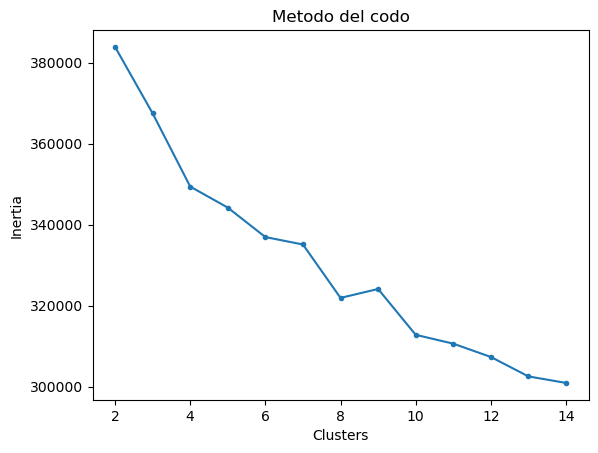

In [186]:
plt.plot(range(2, 15), inertia, '.-')
plt.xlabel("Clusters")
plt.ylabel("Inertia")
plt.title("Metodo del codo")

#Idk what is inertia even
#No hay codo

# KMeans - Coactivation Matrix

In [187]:
k = 4
kmeans = KMeans(n_clusters=k).fit(cm_normalized)
kmeans

KMeans(n_clusters=4)

In [188]:
labels = kmeans.labels_
labels

array([2, 2, 2, 2, 2, 0, 0, 3, 2, 2, 2, 2, 0, 2, 2, 2, 3, 2, 0, 3, 0, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 0, 3, 0, 2, 0, 3, 0,
       3, 3, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 3, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3,
       2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 1,
       2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 3, 0, 0, 0, 2, 3, 2, 0, 0, 0, 0, 2,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 2, 1, 1, 1, 3, 1, 2, 2, 2, 3, 2, 3, 2, 1,

# Make the graph (Dah)

In [189]:
G = nx.from_numpy_array(coactivation_matrix)
positions = {i: (coordinates_coactivation_matrix[i, 0], coordinates_coactivation_matrix[i, 1]) for i in range(len(coordinates_coactivation_matrix))}

# Draw the graph (Dah)

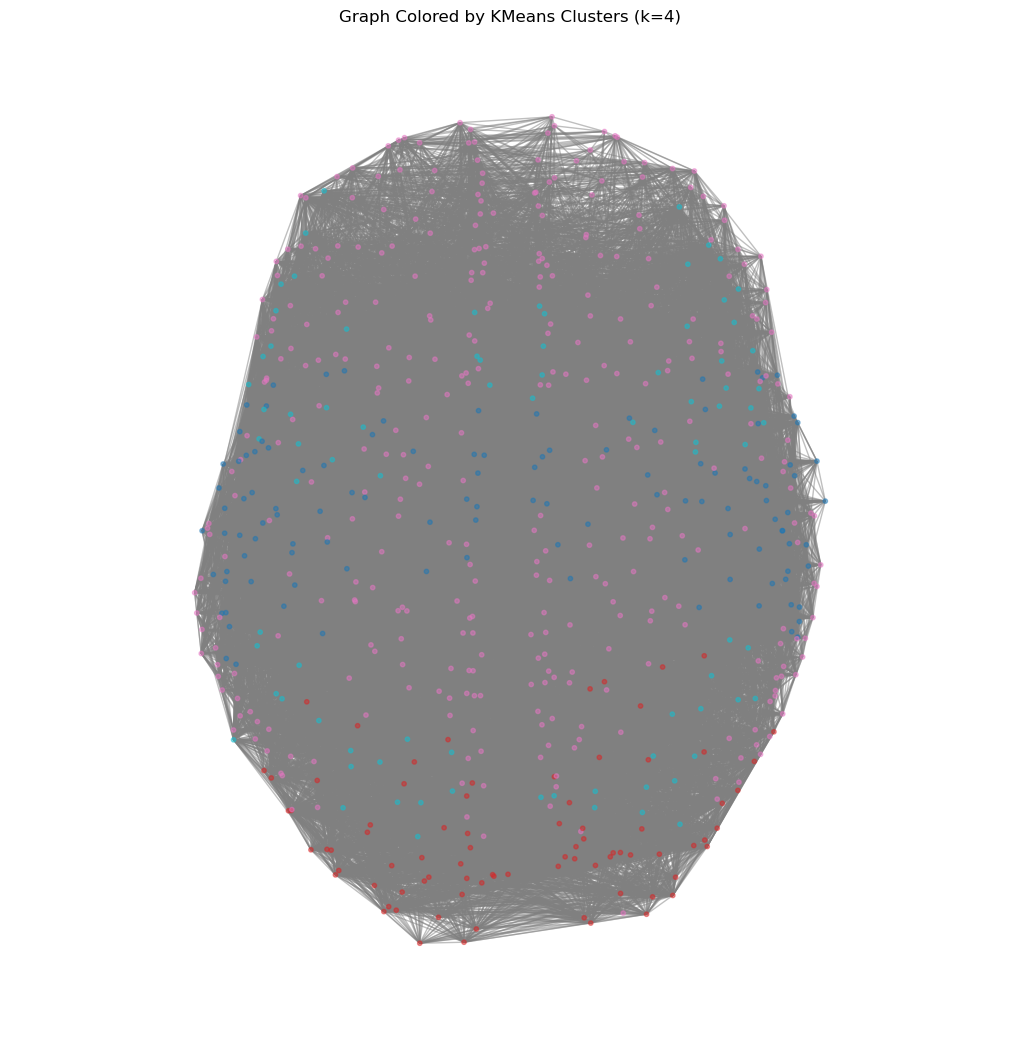

In [190]:
plt.figure(figsize=(10, 10))
nx.draw(
    G,
    pos=positions,
    node_color=labels,
    node_size=10,
    edge_color='gray',
    alpha=0.5,
    with_labels=False,
    cmap=plt.get_cmap('tab10', k)

)
plt.title(f"Graph Colored by KMeans Clusters (k={k})")
plt.axis('equal')
plt.show()

# Gaussian Mixture - Coactivation Matrix

In [216]:
k = 4
gm_cm = GaussianMixture(n_components=k, random_state=0).fit(cm_normalized)
gm_cm

GaussianMixture(n_components=4, random_state=0)

In [218]:
labels_cm_gaus = gm.predict(coactivation_matrix)
labels_cm_gaus

array([1, 1, 1, 1, 1, 3, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 3, 0, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 0, 3, 0, 3, 0, 0,
       0, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 2,
       1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 3, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 0, 0, 3, 3, 1, 0, 1, 3, 3, 3, 3, 1,
       2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 1, 0, 2, 1, 1, 1, 0, 1, 0, 1, 1,

# Plot the graph Gaussian Mixture

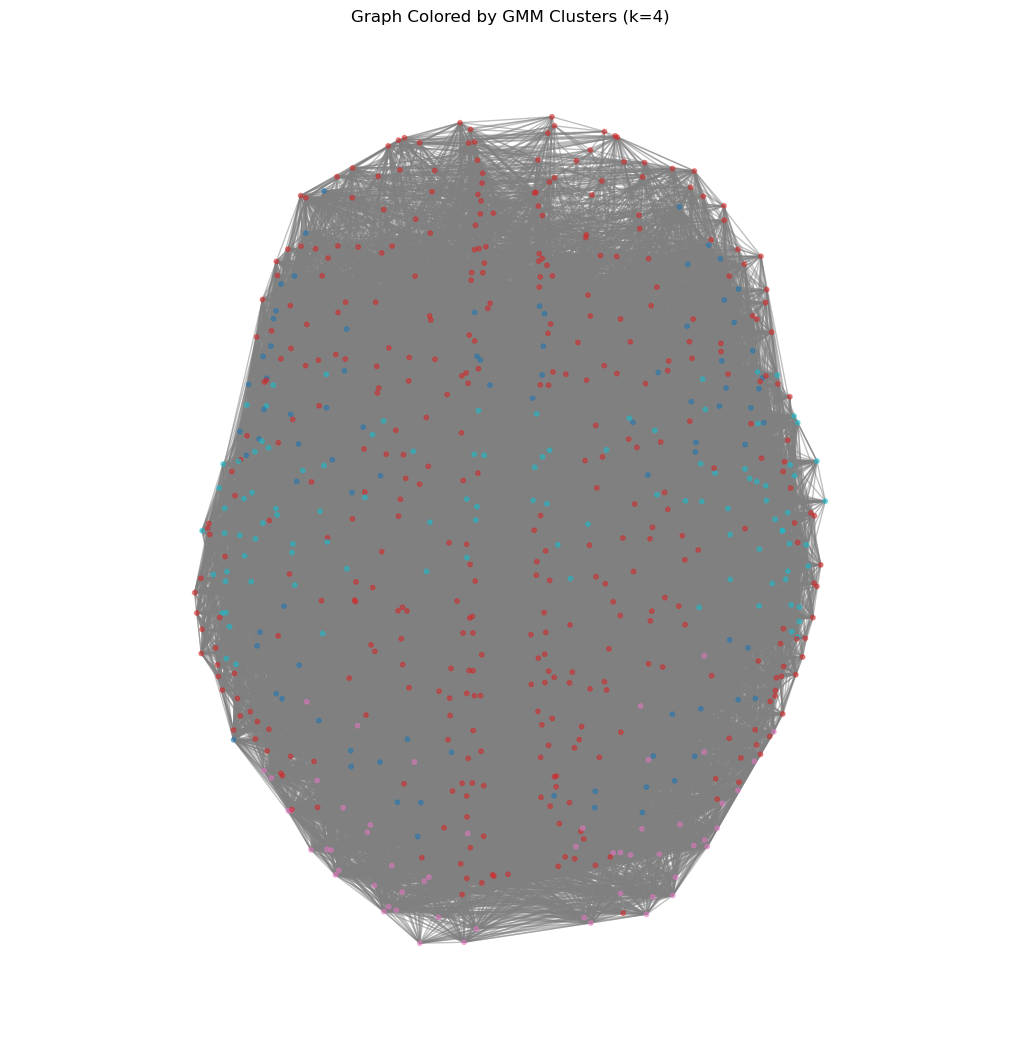

In [219]:
plt.figure(figsize=(10, 10))
nx.draw(
    G,
    pos=positions,
    node_color=labels_cm_gaus,
    node_size=10,
    edge_color='gray',
    alpha=0.5,
    with_labels=False,
    cmap=plt.get_cmap('tab10', k)
)
plt.title(f"Graph Colored by GMM Clusters (k={k})")
plt.axis('equal')
plt.show()

# Brain tumor

In [220]:
path_bt = r"Brain Tumor.csv"
df_bt = pd.read_csv(path_bt)
df_bt

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,Image3758,0,21.234512,1208.850174,34.768523,0.063774,2.082079,4.647310,158.437600,0.220666,0.048693,0.487131,5.211739,0.950972,7.458341e-155
3758,Image3759,0,20.435349,1227.151440,35.030721,0.066763,2.144625,4.882034,161.158675,0.225931,0.051045,0.502712,5.083126,0.952749,7.458341e-155
3759,Image3760,0,18.011520,1151.582765,33.934978,0.068396,2.308349,5.579498,167.130118,0.228930,0.052409,0.492269,5.103700,0.952181,7.458341e-155
3760,Image3761,0,13.330429,945.732779,30.752769,0.087872,2.732822,7.757570,223.812932,0.261527,0.068397,0.480064,6.439784,0.940898,7.458341e-155


In [221]:
df_bt_filtered = df_bt.drop(columns=['Image', 'Class', 'Coarseness'])
df_bt_filtered

,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation
0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939
1,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834
2,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014
3,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189
4,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789
...,...,...,...,...,...,...,...,...,...,...,...,...
3757,21.234512,1208.850174,34.768523,0.063774,2.082079,4.647310,158.437600,0.220666,0.048693,0.487131,5.211739,0.950972
3758,20.435349,1227.151440,35.030721,0.066763,2.144625,4.882034,161.158675,0.225931,0.051045,0.502712,5.083126,0.952749
3759,18.011520,1151.582765,33.934978,0.068396,2.308349,5.579498,167.130118,0.228930,0.052409,0.492269,5.103700,0.952181
3760,13.330429,945.732779,30.752769,0.087872,2.732822,7.757570,223.812932,0.261527,0.068397,0.480064,6.439784,0.940898


# Normalized data - Brain Tumor

In [222]:
bt_normalized = StandardScaler().fit_transform(df_bt_filtered)
bt_normalized
#Normalized data (Looks horrible also)

array([[-0.51570041, -0.19579009, -0.0331438 , ...,  0.40409983,
        -0.12170857,  1.00071256],
       [-0.12901813,  0.2029431 ,  0.365594  , ...,  1.34545658,
        -0.79918084,  1.26437684],
       [-0.37501262,  0.9257654 ,  0.98467952, ..., -1.64939073,
         0.69370439,  0.85063591],
       ...,
       [ 1.48808151,  0.94239883,  0.99775976, ...,  0.10176566,
         0.21903689, -0.13709518],
       [ 0.67074636,  0.50198829,  0.63500562, ...,  0.00634627,
         0.94127334, -0.56851738],
       [-0.58994208, -0.4925432 , -0.37084695, ...,  0.11789953,
         1.12914289, -0.65138728]], shape=(3762, 12))

# Metodo de codo - Brain Tumor

In [227]:
inertia = []
it_per = []

for no_cluster in range(2, 15):
    kmeans = KMeans(n_clusters=no_cluster)
    kmeans.fit(bt_normalized)
    inertia.append(kmeans.inertia_)
    it_per.append(kmeans.n_iter_)

Text(0.5, 1.0, 'Metodo del codo')

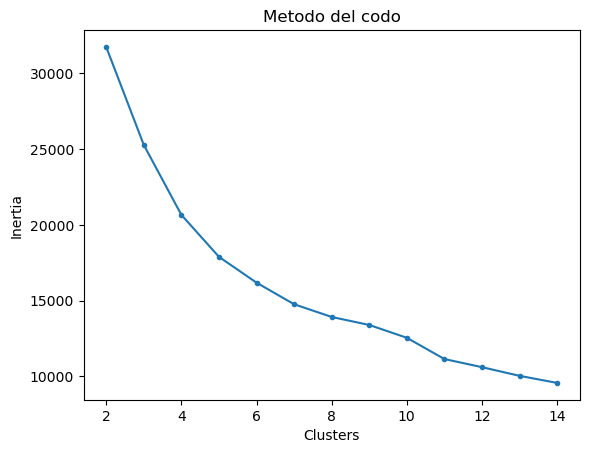

In [228]:
plt.plot(range(2, 15), inertia, '.-')
plt.xlabel("Clusters")
plt.ylabel("Inertia")
plt.title("Metodo del codo")

#Idk what is inertia even
#No hay codo

#  KMeans - Brain Tumor

In [260]:
k = 2
bt_kmeans = KMeans(n_clusters=k).fit(bt_normalized)
bt_kmeans

KMeans(n_clusters=2)

In [261]:
bt_labels = bt_kmeans.labels_
bt_labels

array([0, 0, 1, ..., 1, 1, 0], shape=(3762,), dtype=int32)

In [262]:
df_bt_n = pd.DataFrame(data= bt_normalized)
df_bt_n

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.515700,-0.195790,-0.033144,0.504650,0.067855,-0.097267,-0.268050,0.685118,0.470073,0.404100,-0.121709,1.000713
1,-0.129018,0.202943,0.365594,2.746050,-0.150204,-0.175881,-0.585492,2.090287,2.865580,1.345457,-0.799181,1.264377
2,-0.375013,0.925765,0.984680,-1.026708,0.374531,0.037048,-0.421010,-1.335981,-0.988340,-1.649391,0.693704,0.850636
3,-0.616481,0.531896,0.660820,-1.026561,0.615188,0.160202,0.212525,-1.335154,-0.988223,-1.840334,1.622995,0.322041
4,-0.379529,0.039451,0.208352,1.041256,0.070489,-0.094103,0.429532,1.075849,1.022442,0.171115,1.154744,0.650854
...,...,...,...,...,...,...,...,...,...,...,...,...
3757,2.050827,1.064921,1.092779,-0.139892,-0.789131,-0.349862,0.278359,0.123407,-0.170487,0.061596,0.277439,-0.183335
3758,1.911290,1.104076,1.122668,-0.097345,-0.764704,-0.345702,0.303212,0.164116,-0.130150,0.183409,0.207915,-0.115377
3759,1.488082,0.942399,0.997760,-0.074100,-0.700765,-0.333342,0.357754,0.187301,-0.106751,0.101766,0.219037,-0.137095
3760,0.670746,0.501988,0.635006,0.203090,-0.534994,-0.294742,0.875475,0.439344,0.167517,0.006346,0.941273,-0.568517


In [263]:
df_bt_n['kmeans'] = bt_labels
df_bt_n

,0,1,2,3,4,5,6,7,8,9,10,11,kmeans
0,-0.515700,-0.195790,-0.033144,0.504650,0.067855,-0.097267,-0.268050,0.685118,0.470073,0.404100,-0.121709,1.000713,0
1,-0.129018,0.202943,0.365594,2.746050,-0.150204,-0.175881,-0.585492,2.090287,2.865580,1.345457,-0.799181,1.264377,0
2,-0.375013,0.925765,0.984680,-1.026708,0.374531,0.037048,-0.421010,-1.335981,-0.988340,-1.649391,0.693704,0.850636,1
3,-0.616481,0.531896,0.660820,-1.026561,0.615188,0.160202,0.212525,-1.335154,-0.988223,-1.840334,1.622995,0.322041,1
4,-0.379529,0.039451,0.208352,1.041256,0.070489,-0.094103,0.429532,1.075849,1.022442,0.171115,1.154744,0.650854,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,2.050827,1.064921,1.092779,-0.139892,-0.789131,-0.349862,0.278359,0.123407,-0.170487,0.061596,0.277439,-0.183335,1
3758,1.911290,1.104076,1.122668,-0.097345,-0.764704,-0.345702,0.303212,0.164116,-0.130150,0.183409,0.207915,-0.115377,1
3759,1.488082,0.942399,0.997760,-0.074100,-0.700765,-0.333342,0.357754,0.187301,-0.106751,0.101766,0.219037,-0.137095,1
3760,0.670746,0.501988,0.635006,0.203090,-0.534994,-0.294742,0.875475,0.439344,0.167517,0.006346,0.941273,-0.568517,1


# Gaussian Mixture - Brain Tumor

In [273]:
k = 2
gm_bt = GaussianMixture(n_components=k, random_state=0).fit(bt_normalized)
gm_bt

GaussianMixture(n_components=2, random_state=0)

In [274]:
gm_bt.get_metadata_routing

<bound method _MetadataRequester.get_metadata_routing of GaussianMixture(n_components=2, random_state=0)>

In [275]:
bt_labels__gaus = gm_bt.predict(bt_normalized)
bt_labels__gaus

array([0, 0, 1, ..., 0, 0, 0], shape=(3762,))

# Clustering jerárquico - Brain Tumor

[]

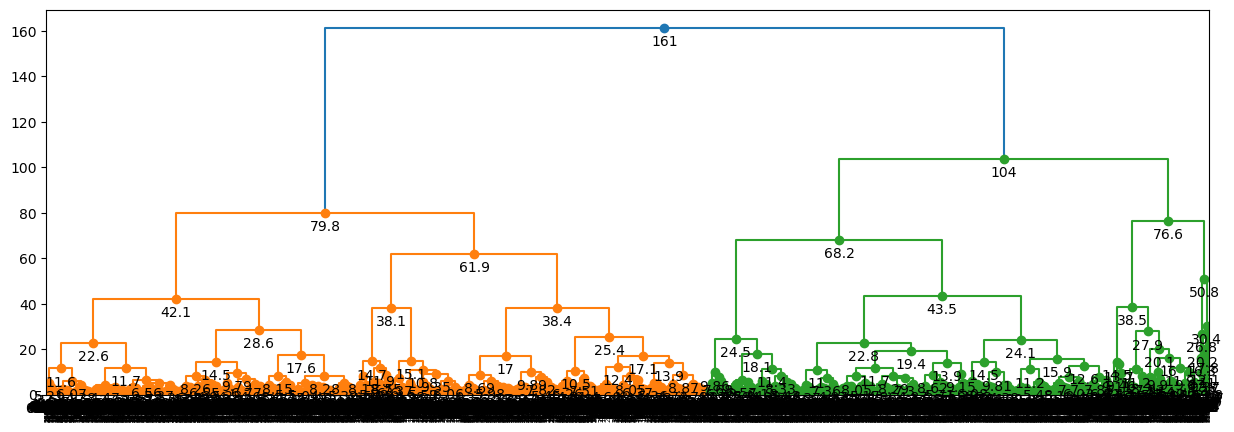

In [296]:
Z = linkage(bt_normalized, 'ward')

plt.figure(figsize=(15, 5))
ddata = dendrogram(Z)
for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
    x = 0.5 * sum(i[1:3])
    y = d[1]
    plt.plot(x,y,'o',c=c)
    plt.annotate('%.3g'%y, (x,y), xytext=(0,-5), 
                 textcoords="offset points", va="top", ha="center")

plt.plot()

In [301]:
labels_jerarquía = fcluster(Z, 2, criterion='maxclust')
labels_jerarquía = labels_jerarquía - 1
labels_jerarquía

array([0, 0, 1, ..., 0, 0, 0], shape=(3762,), dtype=int32)

# Confusion Matrix

In [285]:
#OG Values

y_true = df_bt["Class"].values
y_true

array([0, 0, 1, ..., 0, 0, 0], shape=(3762,))

In [286]:
#KMeans clustering

kmeans_labels = bt_labels
kmeans_labels

array([0, 0, 1, ..., 1, 1, 0], shape=(3762,), dtype=int32)

In [287]:
#Gaussian Mixture Values
bt_labels__gaus

array([0, 0, 1, ..., 0, 0, 0], shape=(3762,))

In [ ]:
#Cluster Jerárquico Values
labels_jerarquía

In [288]:
# Confusion Matrix KMeans

cm_kmeans = confusion_matrix(y_true, kmeans_labels)
cm_kmeans

array([[1971,  108],
       [  80, 1603]])

In [289]:
# Confusion Gaussian Mixture

cm_gaus = confusion_matrix(y_true, bt_labels__gaus)
cm_gaus

array([[2056,   23],
       [  60, 1623]])

In [ ]:
#Confusión Cluster Jerárquico 

In [302]:
cm_cj = confusion_matrix(y_true, labels_jerarquía)
cm_cj

array([[2053,   26],
       [  94, 1589]])

Text(978.81045751634, 0.5, 'Real')

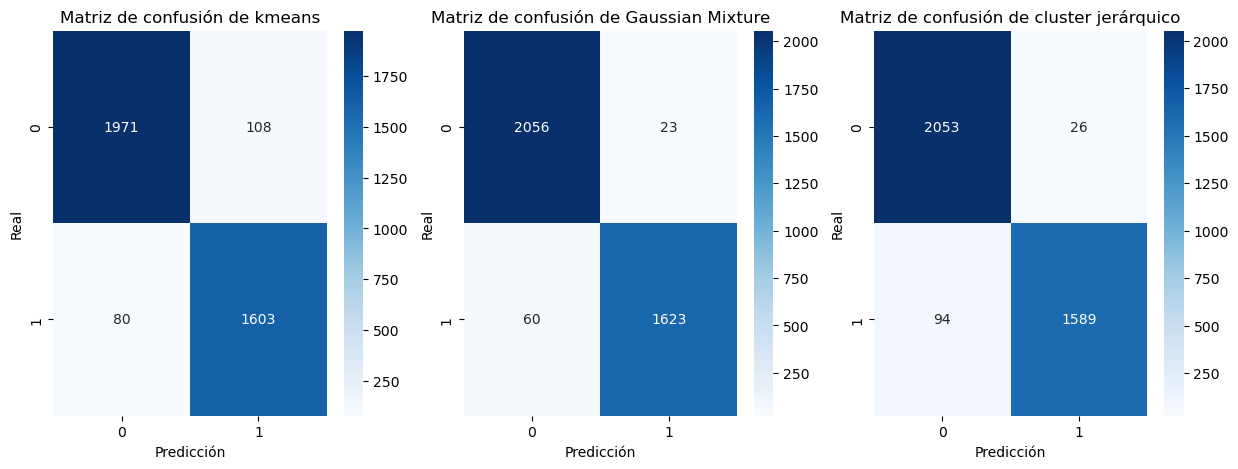

In [303]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.heatmap(cm_kmeans, annot=True, cmap="Blues", fmt='d', ax = axes[0]).set_title("Matriz de confusión de kmeans")

axes[0].set_xlabel('Predicción')
axes[0].set_ylabel("Real")

sns.heatmap(cm_gaus, annot=True, cmap="Blues", fmt='d', ax = axes[1]).set_title("Matriz de confusión de Gaussian Mixture")

axes[1].set_xlabel('Predicción')
axes[1].set_ylabel("Real")

sns.heatmap(cm_cj, annot=True, cmap="Blues", fmt='d', ax = axes[2]).set_title("Matriz de confusión de cluster jerárquico")

axes[2].set_xlabel('Predicción')
axes[2].set_ylabel("Real")

In [ ]:
#Parece que el Gaussian mixture es el mejor por la matriz de confusión

Precision es la proporción de verdaderos positivos entre todos los casos que el modelo predijo como positivos. Mide cuántas de las predicciones positivas fueron correctas.

Accuracy es la proporción de predicciones correctas (tanto positivas como negativas) entre el total de predicciones. Indica qué tan bien acierta el modelo en general.

Recall es la proporción de verdaderos positivos entre todos los casos que realmente eran positivos. Mide qué tanto del total real positivo fue detectado.

F1-score es la media armónica entre precision y recall. Resume el balance entre ambos cuando hay clases desbalanceadas o cuando ambas métricas son importantes.

In [308]:
true = y_true 
lkmeans = kmeans_labels
lgaus = bt_labels__gaus
lcl = labels_jerarquía

# KMeans scores

In [312]:

accuracy = accuracy_score(true, lkmeans)
precision = precision_score(true, lkmeans)
recall = recall_score(true, lkmeans)
f1 = f1_score(true, lkmeans)

accuracy, precision, recall, f1

(0.950026581605529, 0.9368790181180596, 0.952465834818776, 0.9446081319976429)

# Gaussian Mixture scores

In [313]:
accuracy = accuracy_score(true, lgaus)
precision = precision_score(true, lgaus)
recall = recall_score(true, lgaus)
f1 = f1_score(true, lgaus)

accuracy, precision, recall, f1

(0.9779372674109517, 0.9860267314702309, 0.964349376114082, 0.9750675878642235)

# Cluster jerárquico scores

In [314]:
accuracy = accuracy_score(true, lcl)
precision = precision_score(true, lcl)
recall = recall_score(true, lcl)
f1 = f1_score(true, lcl)

accuracy, precision, recall, f1

(0.9681020733652312,
 0.9839009287925696,
 0.9441473559120618,
 0.9636143117040631)

In [ ]:
#Gaussian Mixture es la mejor
#Más hacía el 1 es mejor